In [48]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns, numpy as np
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Read the CSV file

In [49]:
df = pd.read_csv('C:\\mydata\\ieee-fraud-detection\\train_transaction.csv')

# Show the contents
print(df.describe())

       TransactionID        isFraud  TransactionDT  TransactionAmt  \
count   5.905400e+05  590540.000000   5.905400e+05   590540.000000   
mean    3.282270e+06       0.034990   7.372311e+06      135.027176   
std     1.704744e+05       0.183755   4.617224e+06      239.162522   
min     2.987000e+06       0.000000   8.640000e+04        0.251000   
25%     3.134635e+06       0.000000   3.027058e+06       43.321000   
50%     3.282270e+06       0.000000   7.306528e+06       68.769000   
75%     3.429904e+06       0.000000   1.124662e+07      125.000000   
max     3.577539e+06       1.000000   1.581113e+07    31937.391000   

               card1          card2          card3          card5  \
count  590540.000000  581607.000000  588975.000000  586281.000000   
mean     9898.734658     362.555488     153.194925     199.278897   
std      4901.170153     157.793246      11.336444      41.244453   
min      1000.000000     100.000000     100.000000     100.000000   
25%      6019.000000    

# Seaborn Plot

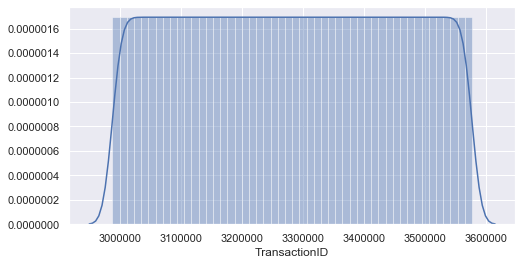

In [54]:
sns.set(rc={"figure.figsize": (8, 4)}); np.random.seed(0)
ax = sns.distplot(df['TransactionID'])
plt.show()

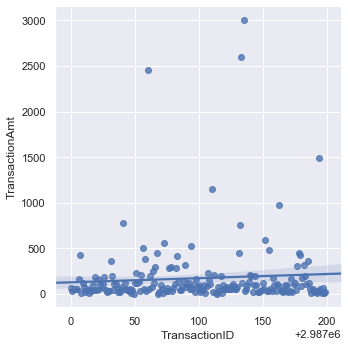

In [66]:
# Plot TransactionID vs TransactionAmt - First 200 Rows
df_ = df[['TransactionID','TransactionAmt']]
sns.lmplot(x="TransactionID", y="TransactionAmt", data=df_.head(200))

# Read Transaction Data

In [51]:
data = pd.read_csv('C:\\mydata\\ieee-fraud-detection\\train_transaction.csv')

In [52]:
# Only use the 'TransactionAmt' and 'card1','card2','card3' features
features = ['TransactionAmt', 'card1','card2','card3']

print(features)

# The target variable which we would like to predict, is the 'Class' variable
target = 'isFraud'

# Now create an X variable (containing the features) and an y variable (containing only the target variable)
X = data[features].fillna(0)
y = data[target].fillna(0)

['TransactionAmt', 'card1', 'card2', 'card3']


In [42]:
def normalize(X):
    """
    Make the distribution of the values of each variable similar by subtracting the mean and by dividing by the standard deviation.
    """
    for feature in X.columns:
        X[feature] -= X[feature].mean()
        X[feature] /= X[feature].std()
    return X

# Define the model

In [43]:
model = LogisticRegression()

# Define the splitter for splitting the data in a train set and a test set
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=0)

# Loop through the splits (only one)
for train_indices, test_indices in splitter.split(X, y):
    # Select the train and test data
    X_train, y_train = X.iloc[train_indices], y.iloc[train_indices]
    X_test, y_test = X.iloc[test_indices], y.iloc[test_indices]
    
    # Normalize the data
    X_train = normalize(X_train)
    X_test = normalize(X_test)
    
    # Fit and predict!
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # And finally: show the results
    print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98    284939
           1       0.07      0.00      0.00     10331

    accuracy                           0.96    295270
   macro avg       0.52      0.50      0.49    295270
weighted avg       0.93      0.96      0.95    295270

